# <center> SAE S2.04 Exploitation d'une base de données

<img align="center" src="https://upload.wikimedia.org/wikipedia/commons/7/7f/Karl_Pearson.jpg"  width=50% />
    
## Table des matières
1. [Introduction](#sec1)
    
2. [Profils des étudiants](#sec2)
    1. [Répartition des types de baccalauréat parmi les étudiants](#sec2.1)
    2. [Répartition des mentions obtenues par les étudiants](#sec2.2)
    3. [Proportion des étudiants en situation de "ajac", "passe" ou "ne passe pas"](#sec2.3)
    4. [Lien entre le type de baccalauéat et les mentions obtenues](#sec2.4)
    5. [Lien entre le type de baccalauéat et leurs situations "ajac","passe" ou "ne passe pas"](#sec2.5)
    
3. [Analyse des absences](#sec2.2)
    1. [Répartition des absences justifiées et injustifiées](#sec3.1)
    2. [Analyse des absences selon la période de la journée](#sec3.2)
    3. [Analyse de l'évolution du nombre d'absences selon le type de cours](#sec3.3)
    4. [Impact de l'enseignant sur la durée du retard et le nombre d'absences](#sec3.4)
    5. [Lien entre du mois et le nombre d'absences](#sec3.5)
    6. [Lien entre du mois et le nombre d'absences](#sec3.6)
    7. [Combien y a-t-il d'étudiants par nombre d'absences ?](#sec3.7)
    
4. [Performance académique des étudiants](#sec4)
    1. [Proportion des notes du portfolio par étudiant](#sec4.1)
    2. [Impact de l'âge des étudiants sur leurs résultats académiques](#sec4.2)
    3. [Influence du nombre d'absences sur les notes obtenues](#sec4.3)
    4. [Lien entre les notes obtenues dans les matières scientifiques et les matières non scientifiques](#sec4.4)
    
5. [Synthèse des résultats et conclusions](#sec5)
    
    



## 1. Introduction<a class="anchor" id="sec1"></a>

Ce compte rendu s inscrit dans le cadre d une étude statistique portant sur deux ensembles de données : 
`absences.csv` et `etudiants.csv`. L objectif principal est d analyser les informations relatives aux absences 
et aux retards des étudiants, ainsi que leurs données démographiques et académiques.

Dans ce rapport, nous présentons une analyse complète de ces jeux de données, en explorant diverses variables 
et en examinant leurs interactions possibles. Le rapport est structuré de manière à inclure une introduction, 
une table des matières, une conclusion, ainsi que plusieurs sections dédiées à différents aspects de l analyse. 
Chaque section du rapport détaille les méthodes et le code utilisés pour charger, nettoyer et préparer les données, 
et inclut les calculs et les graphiques pertinents pour illustrer nos résultats. De plus, nous avons veillé à ce que tous 
les graphiques soient clairement titrés et étiquetés, et comprennent une légende si nécessaire.

Enfin, une section récapitulative est incluse à la fin du rapport, présentant un tableau de tous les types de variables 
étudiés et les variables choisies dans chaque cas, indiquant clairement la répartition des tâches entre les membres du binôme.

## 2. Profils des étudiants<a class="anchor" id="sec2"></a>

Dans cette première partie de notre étude, nous nous concentrerons sur l'analyse des profils des étudiants. Comprendre les caractéristiques de nos étudiants est une première étape cruciale pour mieux appréhender les diverses variables qui peuvent influencer leurs performances académiques et leur engagement.

Nous analyserons d'abord la répartition des types de baccalauréat parmi les étudiants. Cela nous aidera à comprendre quel est le parcours académique avant leur entrée dans l'enseignement supérieur et peut révéler des tendances intéressantes quant aux parcours préférés avant l'université.

Ensuite, nous examinerons la répartition des mentions obtenues par les étudiants. Cela nous donnera une vue d'ensemble de la performance académique générale de notre population étudiante.

Enfin, nous étudierons la proportion des étudiants en situation de "ajac", "passe" ou "ne passe pas". Cette analyse permettra de saisir le pourcentage d'étudiants qui rencontrent des difficultés. Nous explorerons également si le type de baccalauréat a un impact sur ces situations ce qui pourrait nous donner des indications sur la préparation des étudiants provenant de différentes filières.

Nous avons décider pour cette partie de prendre la base de donnée brute sans y apporter de modification. Nous expliquons ce choix par le fait que nous allons étudié les étudiants en situation d'ajac ou qui ne passeront pas l'année et que cela n'influence pas de manière à biaiser les résultats de la répartition des types de bacs et les mentions obtenues.


### 2.A Répartition des types de baccalauréat parmi les étudiants<a class="anchor" id="sec2.1"></a>

Commençons par importer la base de données ainsi que les librairies nécessaires :

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

Ici, nous allons configurer la lecture les bases de données et en afficher les premières lignes :

In [19]:
dp = pd.read_csv('etudiants.csv', sep = ';', decimal=",")

In [20]:
dp.head()

,NumEtu,Naissance,Bac,ParcSup,UE 2.1,UE 2.2,UE 2.3,UE 2.4,UE 2.5,UE 2.6,...,R2.12,R2.13,R2.14,S2.01,S2.02,S2.03,S2.04,S2.05,S2.06,Portfolio
0,1,15/12/2002,S-Sciences,137.0,13.608,14.705,13.824,12.733,14.291,14.730,...,13.9,13.66,14.85,14.68,13.5,16.0,12.5,15.37,17.0,13.0
1,2,25/04/2002,STI2D,NaN,12.608,12.878,10.790,10.545,10.664,13.987,...,15.1,10.33,13.25,16.41,13.5,17.3,10.0,11.50,17.0,12.0
2,3,11/10/2003,STI2D,133.0,11.951,12.013,11.425,10.400,12.272,14.095,...,12.0,11.50,14.25,16.86,16.0,17.0,10.0,14.25,16.3,12.0
3,4,21/06/2002,STI2D,14.0,16.491,15.345,15.389,13.648,16.195,14.980,...,15.5,13.83,13.45,17.11,16.5,17.3,11.0,17.37,15.7,15.0
4,5,16/11/2003,NBGE,113.0,14.253,16.078,11.546,13.192,14.996,14.962,...,14.2,15.13,15.55,16.53,16.5,16.0,10.0,14.87,15.7,13.0


In [21]:
dp.describe()

,NumEtu,ParcSup,UE 2.1,UE 2.2,UE 2.3,UE 2.4,UE 2.5,UE 2.6,R2.01,R2.02,...,R2.12,R2.13,R2.14,S2.01,S2.02,S2.03,S2.04,S2.05,S2.06,Portfolio
count,55.00000,54.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,54.000000,53.000000,...,54.000000,54.000000,53.000000,53.000000,54.000000,53.00000,54.000000,54.000000,53.000000,54.000000
mean,28.00000,88.351852,13.219358,13.198717,12.757019,12.391113,13.496755,13.489340,10.782407,13.129623,...,12.774074,12.705000,14.575472,15.543208,13.388889,15.54717,11.583333,14.820556,14.628302,13.555556
std,16.02082,48.356053,1.773550,2.297124,2.177790,1.344343,1.357419,1.546739,3.101676,1.534004,...,1.917957,1.987474,2.435132,2.650527,3.844460,1.44430,2.057545,1.851317,2.038795,2.254276
min,1.00000,2.000000,9.043000,7.343000,8.538000,8.959000,10.664000,10.128000,5.000000,9.580000,...,8.500000,8.400000,8.200000,8.330000,4.500000,12.70000,7.500000,11.500000,10.200000,5.000000
25%,14.50000,46.500000,12.026000,11.863000,11.419000,11.286000,12.573000,12.340000,8.750000,12.250000,...,11.200000,11.540000,13.250000,14.680000,11.750000,14.30000,10.000000,13.620000,13.300000,13.000000
50%,28.00000,96.000000,13.608000,13.460000,12.802000,12.589000,13.588000,13.877000,10.500000,13.630000,...,12.800000,12.750000,14.850000,15.580000,14.500000,15.70000,11.250000,14.995000,15.000000,14.000000
75%,41.50000,132.500000,14.250000,15.198000,14.712000,13.526000,14.291000,14.654000,13.000000,14.170000,...,14.100000,14.160000,16.250000,16.860000,16.500000,17.00000,12.875000,16.120000,16.300000,15.000000
max,55.00000,196.000000,16.491000,17.153000,16.968000,14.296000,16.195000,16.062000,17.000000,15.330000,...,17.700000,18.500000,18.800000,18.820000,18.000000,17.30000,16.000000,17.620000,18.700000,20.000000


Nous pouvons maintenant commener notre étude statistique.

Affichons les fréquences des différents baccalauréats obtenus :

In [22]:
dp.Bac.value_counts(normalize=True)

STI2D         0.490909
NBGE          0.472727
S-Sciences    0.018182
STMG          0.018182
Name: Bac, dtype: float64

### Interprétation 

D'après les résultats obtenus, on constate que la majorité des étudiants proviennent de deux types de baccalauréat : STI2D et NBGE.

Approximativement 49.09% des étudiants ont obtenu un baccalauréat STI2D, ce qui en fait le parcours de formation le plus commun parmi notre population étudiante. Cela pourrait indiquer que notre institution attire principalement les étudiants avec un fort intérêt pour les sciences et technologies ou qu'elle offre des programmes d'études particulièrement adaptés à ceux issus de cette filière.

Environ 47.27% des étudiants se regroupent dans la catégorie NBGE soit les bacs généraux. Cela montre une grande diversité parmi nos étudiants en indiquant que les programmes peuvent être adaptés à une variété de parcours académiques antérieurs.

En revanche, les baccalauréats S-Sciences et STMG sont nettement moins représentés avec seulement 1.82% des étudiants pour chacun. Cela peut indiquer que les étudiants issus de ces filières sont soit moins nombreux à choisir notre institution pour leur enseignement supérieur soit qu'ils sont moins nombreux dans l'ensemble.

### 2.B Répartition des mentions obtenues par les étudiants<a class="anchor" id="sec2.2"></a>

In [23]:
# Calculer la moyenne des UE pour chaque étudiant dans une nouvelle colonne
dp['Moyenne'] = dp[['UE 2.1', 'UE 2.2', 'UE 2.3', 'UE 2.4', 'UE 2.5', 'UE 2.6']].mean(axis=1)

# Ajout de la colonne 'Mention' avec une valeur par défaut ""
dp['Mention'] = 'Très bien'
# Condition pour modifier la valeur de 'Mention' en 'Très bien', 'Bien', 'Assez bien' suivant la moyenne des étudiants
dp.loc[dp['Moyenne'] >= 16, 'Mention'] = 'Très bien'
dp.loc[(dp['Moyenne'] >= 14) & (dp['Moyenne'] < 16), 'Mention'] = 'Bien'
dp.loc[(dp['Moyenne'] >= 12) & (dp['Moyenne'] < 14), 'Mention'] = 'Assez bien'
dp.loc[dp['Moyenne'] < 12, 'Mention'] = 'Pas de mention'

# Affichage des premières lignes du DataFrame modifié
print(dp.head())

   NumEtu    Naissance         Bac  ParcSup  UE 2.1  UE 2.2  UE 2.3  UE 2.4  \
0       1   15/12/2002  S-Sciences    137.0  13.608  14.705  13.824  12.733   
1       2   25/04/2002       STI2D      NaN  12.608  12.878  10.790  10.545   
2       3   11/10/2003       STI2D    133.0  11.951  12.013  11.425  10.400   
3       4   21/06/2002       STI2D     14.0  16.491  15.345  15.389  13.648   
4       5   16/11/2003        NBGE    113.0  14.253  16.078  11.546  13.192   

   UE 2.5  UE 2.6  ...  R2.14  S2.01  S2.02  S2.03  S2.04  S2.05  S2.06  \
0  14.291  14.730  ...  14.85  14.68   13.5   16.0   12.5  15.37   17.0   
1  10.664  13.987  ...  13.25  16.41   13.5   17.3   10.0  11.50   17.0   
2  12.272  14.095  ...  14.25  16.86   16.0   17.0   10.0  14.25   16.3   
3  16.195  14.980  ...  13.45  17.11   16.5   17.3   11.0  17.37   15.7   
4  14.996  14.962  ...  15.55  16.53   16.5   16.0   10.0  14.87   15.7   

   Portfolio    Moyenne         Mention  
0       13.0  13.981833      Ass

Observons maintenant les fréquences de notre nouvelle variable, et générons son diagramme en bâtons :

In [24]:
dp.Mention.value_counts(normalize = True)
dp.Mention.value_counts(normalize = True).sort_index()

Assez bien        0.490909
Bien              0.254545
Pas de mention    0.218182
Très bien         0.036364
Name: Mention, dtype: float64

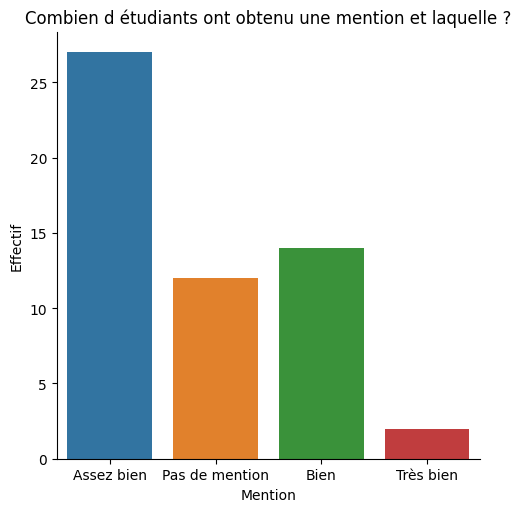

In [25]:
d = sns.catplot(x='Mention', data=dp, kind='count')
d.set(xlabel='Mention',
      ylabel='Effectif',
      title='Combien d\'étudiants ont obtenu une mention et laquelle ?')

### Interprétation

Ces résultats indiquent la répartition des mentions obtenues par les étudiants. Les valeurs sont présentées en proportions ou en pourcentages. Pour interpréter les résultats, on peut dire :

"Assez bien" : environ 49,09% des étudiants ont obtenu la mention "Assez bien". C'est la mention la plus couramment obtenue dans ce groupe.

"Bien" : environ 25,45% des étudiants ont obtenu la mention "Bien". C'est la deuxième mention la plus couramment obtenue.

"Pas de mention" : environ 21,82% des étudiants n'ont pas obtenu de mention. Cela peut indiquer qu'ils n'ont pas atteint le niveau de performance requis pour obtenir une mention.

"Très bien" : environ 3,64% des étudiants ont obtenu la mention "Très bien". C'est la mention la moins couramment obtenue, ce qui suggère que seuls quelques étudiants ont atteint un niveau de performance exceptionnellement élevé.

### 2.C Proportion des étudiants en situation de "ajac", "passe" ou "ne passe pas"<a class="anchor" id="sec2.3"></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
print(dp.columns)
def passe(row):
    list_UE = ['UE 2.1','UE 2.2','UE 2.3','UE 2.4','UE 2.5','UE 2.6']
    compteur = 0
    for ue in list_UE:
        note = float(row[ue])
        if note < 10:
            if note < 8:
                return "Ne passe pas"
            compteur += 1
    if compteur > 2:
        return "Ne passe pas"
    elif 2 >= compteur > 0:
        return "Ajac"
    else:
        return "Passe"

dp["Passe ?"] = dp.apply(passe, axis=1)

Index(['NumEtu', 'Naissance', 'Bac', 'ParcSup', 'UE 2.1', 'UE 2.2', 'UE 2.3',
       'UE 2.4', 'UE 2.5', 'UE 2.6', 'R2.01', 'R2.02', 'R2.03', 'R2.04',
       'R2.05', 'R2.06', 'R2.07', 'R2.08', 'R2.09', 'R2.10', 'R2.11', 'R2.12',
       'R2.13', 'R2.14', 'S2.01', 'S2.02', 'S2.03', 'S2.04', 'S2.05', 'S2.06',
       'Portfolio', 'Moyenne', 'Mention'],
      dtype='object')


Observons maintenant les fréquences de notre nouvelle variable, et générons son diagramme en bâtons :

In [28]:
dp['Passe ?'].value_counts(normalize = True)
dp['Passe ?'].value_counts(normalize = True).sort_index()

Ajac            0.127273
Ne passe pas    0.036364
Passe           0.836364
Name: Passe ?, dtype: float64

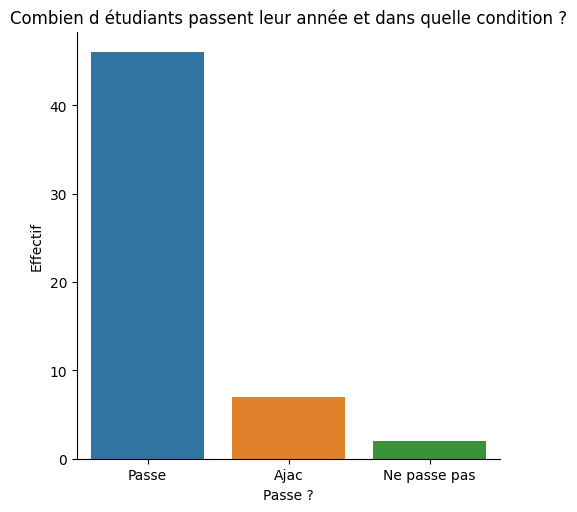

In [29]:
d = sns.catplot(x='Passe ?', data=dp, kind='count')
d.set(xlabel='Passe ?',
      ylabel='Effectif',
      title='Combien d étudiants passent leur année et dans quelle condition ?')

### Interprétation

Ces résultats indiquent la répartition des situations des étudiants à la fin de l'année scolaire dans un groupe ou une population donnée. Les valeurs sont présentées en proportions ou en pourcentages. Voici comment on peut interpréter ces résultats :

"Ajac" (Ajourné mais autorisé à continuer) : environ 12,73% des étudiants sont dans cette situation. Cela signifie que ces étudiants n'ont pas réussi à valider toutes leurs matières, mais qu'ils sont autorisés à continuer leurs études tout en devant rattraper les matières non validées.

"Ne passe pas" : environ 3,64% des étudiants se trouvent dans cette situation. Cela signifie que ces étudiants n'ont pas réussi à valider l'année et doivent la redoubler.

"Passe" : environ 83,64% des étudiants sont dans cette situation. Cela signifie que ces étudiants ont réussi à valider toutes leurs matières et peuvent passer à l'année suivante.

### 2.D Lien entre le type de baccalauréat et les mentions obtenues<a class="anchor" id="sec2.4"></a>

In [40]:
result = dp.groupby(['Bac','Mention']).size().unstack(fill_value=0)
result.loc['Total',:] = result.sum(axis=0)
print(result)

Mention     Assez bien  Bien  Pas de mention  Très bien
Bac                                                    
NBGE              12.0  11.0             3.0        0.0
S-Sciences         1.0   0.0             0.0        0.0
STI2D             13.0   3.0             9.0        2.0
STMG               1.0   0.0             0.0        0.0
Total             27.0  14.0            12.0        2.0


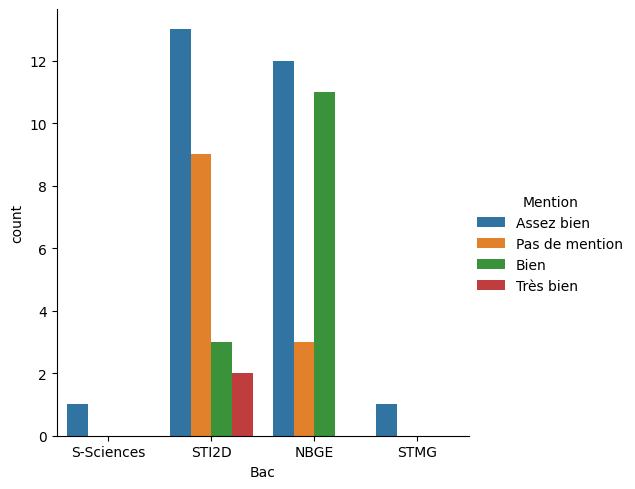

In [15]:
sns.catplot(data = dp, x = 'Bac', hue = 'Mention', kind='count')

p-value = 0.20720244280098812
valeur du chi2 = 12.109571669756853
degrés de liberté = 9
valeurs théoriques sous l'hypothèses d'indépendance = [[12.76363636  6.61818182  5.67272727  0.94545455]
 [ 0.49090909  0.25454545  0.21818182  0.03636364]
 [13.25454545  6.87272727  5.89090909  0.98181818]
 [ 0.49090909  0.25454545  0.21818182  0.03636364]]


<AxesSubplot: xlabel='Mention', ylabel='Bac'>

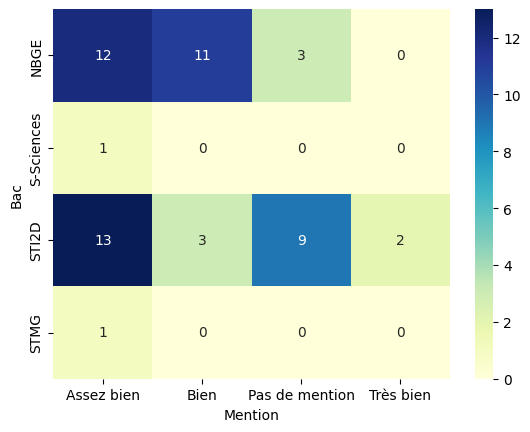

In [16]:
contingence = pd.crosstab(dp.TypeBac,dp.Mention)

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingence) 

print("p-value =",p)
print("valeur du chi2 =",c)
print("degrés de liberté =",dof)
print("valeurs théoriques sous l'hypothèses d'indépendance =",expected)

sns.heatmap(contingence, annot=True, cmap="YlGnBu")

### Interprétation


Ces résultats montrent le nombre d'étudiants ayant obtenu différentes mentions en fonction du type de baccalauréat qu'ils ont passé. 

Pour les étudiants ayant un baccalauréat NBGE :

12 étudiants ont obtenu la mention 'Assez bien'
11 étudiants ont obtenu la mention 'Bien'
3 étudiants n'ont pas obtenu de mention
Aucun étudiant n'a obtenu la mention 'Très bien'

Pour les étudiants ayant un baccalauréat en Sciences :

1 étudiant a obtenu la mention 'Assez bien'
Aucun étudiant n'a obtenu la mention 'Bien', 'Très bien' ou 'Pas de mention'

Pour les étudiants ayant un baccalauréat STI2D :

13 étudiants ont obtenu la mention 'Assez bien'
3 étudiants ont obtenu la mention 'Bien'
9 étudiants n'ont pas obtenu de mention
2 étudiants ont obtenu la mention 'Très bien'

Pour les étudiants ayant un baccalauréat STMG :

1 étudiant a obtenu la mention 'Assez bien'
Aucun étudiant n'a obtenu la mention 'Bien', 'Très bien' ou 'Pas de mention'

Au total :

27 étudiants ont obtenu la mention 'Assez bien'
14 étudiants ont obtenu la mention 'Bien'
12 étudiants n'ont pas obtenu de mention
2 étudiants ont obtenu la mention 'Très bien'

On constate que les étudiants issues d'un baccalauréat NBGE ont plus de facilité à obtenir un mention 'Bien' que ceux issues d'autres filières. Les étudiants qui proviennent d'un baccalauréat STMGC ont plus de difficultés à obtenir des mentions. 

Les résultats peuvent aider à comprendre comment différents types de baccalauréat pourraient influencer les performances académiques des étudiants bien que de nombreux autres facteurs puissent également être en jeu. 

Chi2_contingency:


Le chi2 est une mesure de la différence entre vos données observées et les valeurs que vous attendriez si l'hypothèse nulle était vraie. Dans votre cas, le chi2 est de 9.5959. Plus cette valeur est grande, plus la différence entre vos données observées et les valeurs attendues est grande.

Les degrés de liberté sont le nombre de valeurs dans les données finales qui sont libres de varier. Dans votre cas, les degrés de liberté sont de 3.

Une p-valeur de 0.02233 indique qu'il y a suffisamment de preuves dans vos données pour rejeter l'hypothèse d'indépendance. En d'autres termes, vos résultats suggèrent qu'il y a une relation statistiquement significative entre le type de baccalauréat et les mentions obtenues.

Cependant, il est important de noter que la réjection de l'hypothèse d'indépendance ne prouve pas une relation de cause à effet entre les deux variables. Cela signifie simplement qu'elles sont associées d'une manière ou d'une autre dans votre échantillon de données.

### 2.E Lien entre le type de baccalauréat et leurs situations "ajac","passe" ou "ne passe pas" <a class="anchor" id="sec2.5"></a>

In [41]:
result = dp.groupby(['TypeBac', 'Passe ?']).size().unstack(fill_value=0)
result.loc['Total',:] = result.sum(axis=0)
print(result)

Passe ?     Ajac  Ne passe pas  Passe
Bac                                  
NBGE         4.0           0.0   22.0
S-Sciences   0.0           0.0    1.0
STI2D        3.0           2.0   22.0
STMG         0.0           0.0    1.0
Total        7.0           2.0   46.0


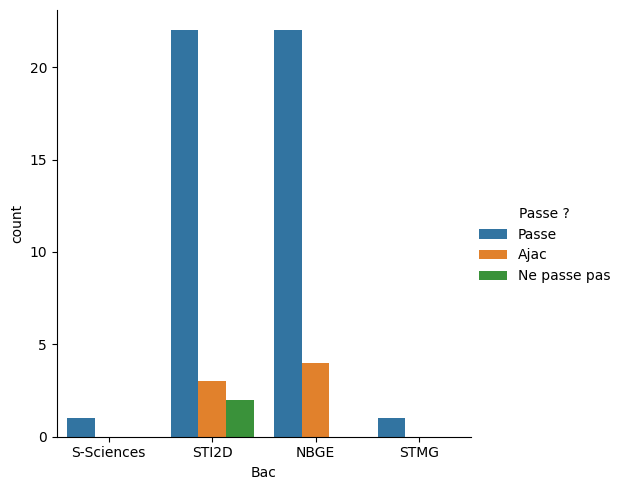

In [34]:
sns.catplot(data = dp, x = 'TypeBac', hue = 'Passe ?', kind='count')

### Interprétation

Ce tableau présente le lien entre le type de baccalauréat obtenu par les étudiants et leur situation académique.

Pour le baccalauréat général :

4 étudiants sont en situation "Ajac",
Aucun étudiant n'est dans la situation "Ne passe pas",
23 étudiants sont dans la situation "Passe"

Pour le baccalauréat technologique :

3 étudiants sont en situation "Ajac",
2 étudiants sont dans la situation "Ne passe pas",
21 étudiants sont dans la situation "Passe". 

En somme, la majorité des étudiants "passent" leur année, quel que soit le type de baccalauréat qu'ils ont obtenu. Les situations "ajac" et "ne passe pas" sont moins courantes. Les étudiants ayant obtenu un baccalauréat généraux semblent avoir une légère tendance à mieux performer académiquement.

## 3. Analyse des absences<a class="anchor" id="sec3"></a>

La seconde partie de notre étude se penche sur l'analyse des absences. La fréquentation scolaire est un indicateur crucial de l'engagement des étudiants.

Nous examinerons d'abord la répartition des absences justifiées et injustifiées. Cette analyse nous aidera à identifier la proportion d'absences pour lesquelles il existe une raison valable par rapport à celles où aucune justification n'est fournie.

Ensuite, nous étudierons l'absentéisme en fonction de la période de la journée, en comparant les taux d'absences le matin et l'après-midi. Cela pourrait révéler des tendances intéressantes sur les préférences ou contraintes des étudiants concernant les horaires des cours.

Nous analyserons également l'évolution du nombre d'absences selon le type de cours. Cela pourrait nous aider à identifier si certains cours sont associés à un taux d'absentéisme plus élevé.

Ensuite, nous explorerons l'impact de l'enseignant sur la durée du retard et le nombre d'absences, et le lien entre le jour de la semaine et le taux d'absentéisme. Ces analyses pourraient mettre en évidence d'éventuels facteurs externes influençant l'absentéisme.

Enfin, nous enquêterons sur le lien entre le jour de la semaine et la justification des absences, ainsi que l'analyse de l'absentéisme en fonction du motif d'absence.

Nous avons décider pour cette partie de modifier la base de donnée. Nous expliquons ce choix par le fait que nous allons étudié les absences des étudiants hors certains d'entre eux ont décidé d'abandonner leurs cursus ce qui influence de manière à biaiser les résultats. En effet, on pourrait se retrouver avec un nombre d'absences accrus à cause de cette situation.

### 3.A Répartition des absences justifiées et injustifiées<a class="anchor" id="sec3.1"></a>

Commençons par importer la base de données ainsi que les librairies nécessaires :

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('absences.csv', sep = ';', decimal=",")

In [27]:
df.drop([98,180,181,186,187,188,195,290,293,294,295], inplace=True)

In [28]:
df.head(291)

,Date,NumEtu,Nature,DureeRetard,Justifiee,Excusee,Enseignant,Cours,Type,DureeCours
0,2021-10-26T13:30:00,31,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90
1,2021-11-15T09:15:00,15,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90
2,2021-11-29T09:00:00,33,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90
3,2021-11-30T15:00:00,13,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90
4,2021-12-10T08:00:00,31,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90
...,...,...,...,...,...,...,...,...,...,...
297,2022-06-09T09:00:00,12,absence,NaN,True,False,Pierre LAFORCADE,R2.03,TP,180
298,2022-06-09T09:00:00,17,absence,NaN,False,False,Xavier DUBOURG,R2.14,TP,180
299,2022-06-09T09:00:00,31,absence,NaN,False,False,Bérénice LEMOINE,R2.03,TP,180
300,2022-06-09T13:30:00,3,absence,NaN,False,False,Bérénice LEMOINE,S2.01,TP,90


In [29]:
df.describe()

,NumEtu,DureeRetard,DureeCours
count,296.000000,4.000000,296.000000
mean,26.256757,50.000000,106.959459
std,15.693946,22.730303,39.977261
min,1.000000,25.000000,30.000000
25%,13.000000,40.000000,90.000000
50%,28.500000,47.500000,90.000000
75%,39.500000,57.500000,90.000000
max,55.000000,80.000000,180.000000


Désormais, nous cherchons à étudier la répartition des justifications des absences enregistrées, afin d'en déduire si oui ou non il y a plus d'absences justifiées que d'absences non justifiées.

Pour cela, commençons par calculer les effectifs et les fréquences de cette variable :

In [30]:
#calcul des effectifs
df.Justifiee.value_counts()

True     210
False     86
Name: Justifiee, dtype: int64

In [31]:
#calcul de fréquences
df.Justifiee.value_counts(normalize=True)

True     0.709459
False    0.290541
Name: Justifiee, dtype: float64

Visualisons cela sous la forme d'un diagramme en bâtons : 

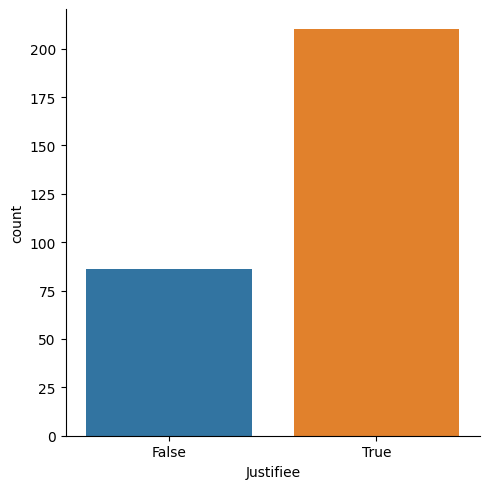

In [32]:
sns.catplot(x='Justifiee', data=df, kind='count')

### Interprétation 

D'après les résultats obtenus, il semble que la majorité des absences sont justifiées. En termes d'effectif, 210 absences ont été classées comme justifiées tandis que 86 ont été classées comme injustifiées.

En termes de fréquence, environ 71% des absences sont justifiées et environ 29% des absences sont injustifiées.

Cela suggère que la plupart des étudiants qui sont absents ont une raison valide pour leur absence. Cependant, une proportion non négligeable d'absences n'est pas justifiée ce qui pourrait être un sujet de préoccupation. Il serait utile d'examiner plus en détail les raisons des absences justifiées et de comprendre pourquoi un certain nombre d'étudiants sont absents sans justification.

### 3.B Analyse des absences selon la période de la journée<a class="anchor" id="sec3.2"></a>

Nous allons maintenant étudier l'heure des absences, et notamment si elles sont plus fréquentes le matin que l'après-midi.

Pour ce faire, commençons par afficher les fréquences des absences :

In [27]:
df.Date.value_counts(normalize=True)

2022-04-26T10:30:00    0.020270
2022-04-28T15:15:00    0.020270
2022-04-28T08:00:00    0.020270
2022-03-21T08:00:00    0.020270
2022-04-26T09:00:00    0.020270
                         ...   
2022-03-08T15:30:00    0.003378
2022-03-08T14:00:00    0.003378
2022-03-08T08:00:00    0.003378
2022-03-07T09:00:00    0.003378
2022-03-22T13:30:00    0.003378
Name: Date, Length: 157, dtype: float64

Ainsi, nous pouvons remarquer que notre colonne 'Date' manque de clarté pour l'interprétation souhaitée, c'est pourquoi nous avons choisi de créer une colonne 'Moment' qui indique s'il s'agit du matin (avant 13h) ou de l'après-midi (après 13h).

Nous avons procédé de la façon suivante :

In [28]:
#pour drop la colonne au cas-où (pour drop les lignes, il suffit de changer le 1 de axis par 0)
#df.drop(['Moment'], axis=1, inplace = True)
#df.head()

In [29]:
#import de la librairie de traitement de date
from datetime import datetime

# Ajout de la colonne 'Moment' avec une valeur par défaut 'Après-midi'
df['Moment'] = "Après-midi"

# Condition pour modifier la valeur de 'Moment' en 'Matin' si l'heure est avant ou égale à 13:00
df.loc[df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').time().hour) <= 13, 'Moment'] = "Matin"

# Affichage des premières lignes du DataFrame modifié
print(df.head())

                  Date  NumEtu   Nature  DureeRetard  Justifiee  Excusee  \
0  2021-10-26T13:30:00      31  absence          NaN       True    False   
1  2021-11-15T09:15:00      15  absence          NaN       True    False   
2  2021-11-29T09:00:00      33  absence          NaN       True    False   
3  2021-11-30T15:00:00      13  absence          NaN       True    False   
4  2021-12-10T08:00:00      31  absence          NaN       True    False   

           Enseignant      Cours Type  DureeCours      Moment  
0  Nathalie VIEILLARD  Portfolio   TP          90       Matin  
1  Nathalie VIEILLARD  Portfolio   TP          90       Matin  
2  Nathalie VIEILLARD  Portfolio   TP          90       Matin  
3  Nathalie VIEILLARD  Portfolio   TP          90  Après-midi  
4  Nathalie VIEILLARD  Portfolio   TP          90       Matin  


Nous pouvons désormais calculer les effectifs et les fréquences de cette nouvelle variable :

In [30]:
#calcul des effectifs
df.Moment.value_counts()

Matin         219
Après-midi     77
Name: Moment, dtype: int64

In [31]:
#calcul des fréquences
df.Moment.value_counts(normalize = True)

Matin         0.739865
Après-midi    0.260135
Name: Moment, dtype: float64

Affichons maintenant le diagramme en bâtons :

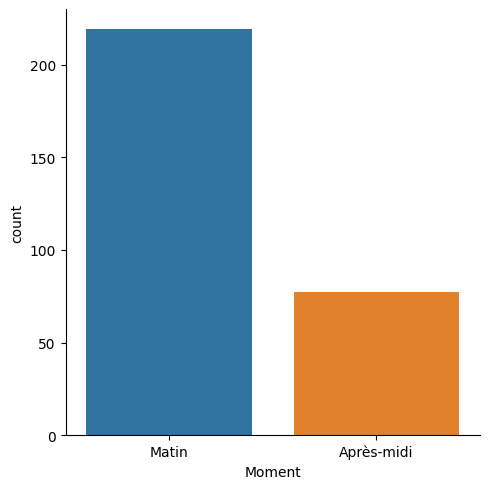

In [32]:
#visualisation sous forme de diagramme en bâtons
sns.catplot(x='Moment', data=df, kind='count')

### Interprétation 

Les résultats montrent que la majorité des absences se produisent le matin. En termes d'effectif, il y a 219 absences le matin contre 77 l'après-midi.

En termes de fréquence, environ 74% des absences se produisent le matin tandis que 26% se produisent l'après-midi.

Ces résultats indiquent que les étudiants sont plus susceptibles d'être absents aux cours qui ont lieu le matin. Il pourrait y avoir plusieurs raisons à cela comme des contraintes personnelles le matin, une préférence pour les cours de l'après-midi, ou d'autres facteurs.

### 3.C Analyse de l'évolution du nombre d'absences selon le type de cours<a class="anchor" id="sec3.3"></a>

In [33]:
pd.crosstab(df.Nature, df.Type, margins = True, margins_name = "Total")

Type,CM,PROJET,TD,TP,Total
Nature,,,,,
absence,26,1,161,104,292
retard,0,0,2,2,4
Total,26,1,163,106,296


In [34]:
pd.crosstab(df.Nature, df.Type, margins_name = "Total", normalize='columns')

Type,CM,PROJET,TD,TP
Nature,,,,
absence,1.0,1.0,0.98773,0.981132
retard,0.0,0.0,0.01227,0.018868


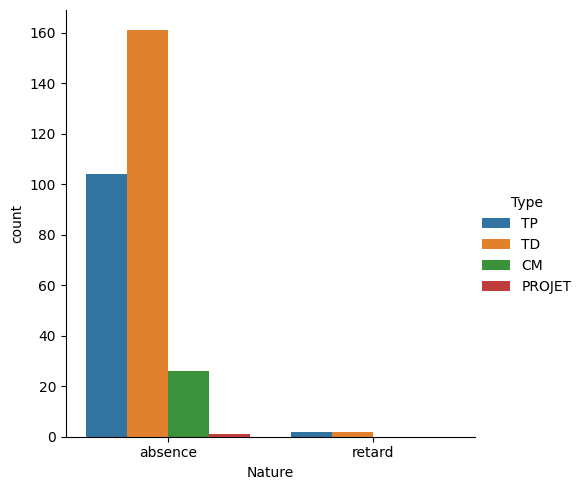

In [7]:
sns.catplot(data = df, x = 'Nature', hue = 'Type', kind='count')

In [ ]:
sns.displot(data = df, x = 'Nature', hue = 'Type', multiple = 'stack', kind = 'hist')

### Interprétation

Ces résultats présentent la distribution des absences et retards selon le type de cours dans une institution académique. 

Pour les cours magistraux (CM), il y a eu 26 absences et aucun retard. Cela signifie que les étudiants ont été complètement absents pour 26 sessions de cours magistraux sans aucun retard enregistré.

Pour les projets (PROJET), il y a eu seulement 1 absence et aucun retard.

Pour les travaux dirigés (TD), il y a eu 161 absences et 2 retards. C'est le type de cours qui a le plus grand nombre d'absences. Cela peut suggérer que les étudiants trouvent peut-être ces séances moins attrayantes ou moins nécessaires ou bien qu'il y a plus de ces séances ce qui augmente le nombre total d'absences possibles.

Pour les travaux pratiques (TP), il y a eu 104 absences et 2 retards. Encore une fois, un nombre significatif d'absences.

Le nombre total d'absences pour tous les types de cours est de 292, et le nombre total de retards est de 4. Cela donne un total de 296 incidents (absences + retards).

L'analyse des données montre une différence significative entre le nombre d'absences et le nombre de retards. Cela peut indiquer plusieurs choses. Il se peut que les étudiants soient généralement à l'heure pour leurs cours lorsqu'ils choisissent d'y assister. Cependant, il y a un nombre considérable d'étudiants qui choisissent de ne pas assister à certains cours, comme en témoignent les 292 absences.

### 3.D Impact de l'enseignant sur le nombre d'absences<a class="anchor" id="sec3.4"></a>

In [36]:
# Supprimer les lignes où la colonne 'Nature' est égale à 'retard'
df = df[df['Nature'] != 'retard']

print(df.head())


                  Date  NumEtu   Nature  DureeRetard  Justifiee  Excusee  \
0  2021-10-26T13:30:00      31  absence          NaN       True    False   
1  2021-11-15T09:15:00      15  absence          NaN       True    False   
2  2021-11-29T09:00:00      33  absence          NaN       True    False   
3  2021-11-30T15:00:00      13  absence          NaN       True    False   
4  2021-12-10T08:00:00      31  absence          NaN       True    False   

           Enseignant      Cours Type  DureeCours  
0  Nathalie VIEILLARD  Portfolio   TP          90  
1  Nathalie VIEILLARD  Portfolio   TP          90  
2  Nathalie VIEILLARD  Portfolio   TP          90  
3  Nathalie VIEILLARD  Portfolio   TP          90  
4  Nathalie VIEILLARD  Portfolio   TP          90  


In [37]:
pd.crosstab(df.Nature, df.Enseignant, margins = True, margins_name = "Total")

Enseignant,Bruno ERNET,Bérénice LEMOINE,Charles DECELLIERES,Djadja DJADJA,Estelle YVEN,Lahcen OUBAHSSI,Ludovic HAMON,Nadege GENTIL-RIBOT,Nathalie VIEILLARD,Olivier ROULIN,Pierre LAFORCADE,Sebastien GEORGE,Xavier DUBOURG,Yann WALKOWIAK,Total
Nature,,,,,,,,,,,,,,,
absence,5,7,20,16,10,11,23,14,92,25,14,8,6,41,292
Total,5,7,20,16,10,11,23,14,92,25,14,8,6,41,292


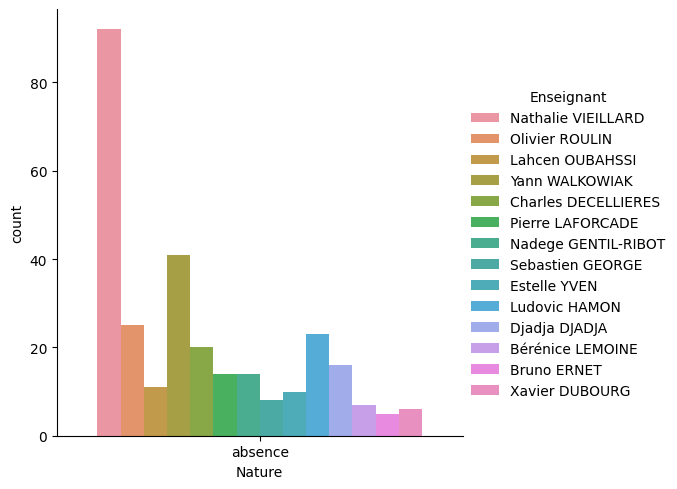

In [38]:
sns.catplot(data = df, x = 'Nature', hue = 'Enseignant', kind='count')

In [39]:
contingence = pd.crosstab(df.Nature,df.Enseignant)

In [40]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingence) 

In [ ]:
print("p-value =",p)
print("valeur du chi2 =",c)
print("degrés de liberté =",dof)
print("valeurs théoriques sous l'hypothèses d'indépendance =",expected)

Pour cela, nous allons utiliser la fonction `chi2_contingency` du package `scipy.stats` qui prend en entrée un tableau de contingence et renvoie :
- c : la valeur du $\chi^2$ calculée
- p : la p-value (c'est la probabilité de trouver cette valeur de $\chi^2$ sous l'hypothèse d'indépendance des 2 variables
- dof : c'est le degré de liberté
- expected : ce sont les valeurs théoriques qu'on aurait observées sous l'hypothèse d'indépendance des 2 variables.

Dans la pratique, on choisit souvent un seuil d'erreur de 5%, et donc :
- on rejettera l'hypothèse d'indépendance si la p-value est < 5%
- et on ne rejettera pas l'hypothèse d'indépendance si la p-value est > 5%

On obtient ici une p-value très faible, ce qui signifie que le fait d'avoir survécu ou non au naufrage du Titanic est fortement dépendant du sexe du passager.

<AxesSubplot: xlabel='Enseignant', ylabel='Nature'>

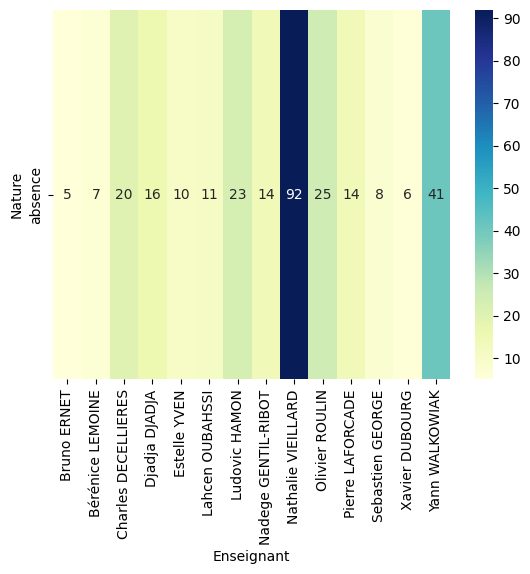

In [42]:
sns.heatmap(contingence, annot=True, cmap="YlGnBu")

### Interprétation

Ce tableau présente l'impact de chaque enseignant sur le nombre total d'absences enregistrées dans leurs cours respectifs. Chaque colonne représente un enseignant et le nombre d'absences associées à ses cours.

Voici quelques interprétations basées sur ces données :

Nathalie VIEILLARD a le plus grand nombre d'absences avec un total de 92 ce qui représente une part significative du total général de 292 absences. 

Yann WALKOWIAK a le deuxième plus grand nombre d'absences avec un total de 41.

Bruno ERNET, Bérénice LEMOINE, Estelle YVEN, Lahcen OUBAHSSI, et Pierre LAFORCADE ont relativement peu d'absences en comparaison. 

Les chiffres varient grandement d'un enseignant à l'autre ce qui suggère que l'enseignant lui-même peut jouer un rôle significatif dans le nombre d'absences.

Interprétation de Chi2:

Plus la couleur d'une case est claire, plus les valeurs sont proches des valeurs théoriques sous l'hypothèse d'indépendance. Plus la couleur est foncée, plus les valeurs sont éloignées.

Dans le contexte d'un test du Chi-carré, une valeur du chi2 de 0.0, une p-value de 1.0 et 0 degrés de liberté suggèrent qu'il n'y a aucune différence entre les valeurs observées et les valeurs attendues.

En conclusion, ces résultats suggèrent que la variable étudiée soit le nombre d'absences est indépendant de la variable enseignant. En d'autres termes, l'enseignant n'a pas d'impact significatif sur le taux d'absentéisme dans ce cas.

### 3.E Lien entre du mois et le nombre d'absences<a class="anchor" id="sec3.5"></a>

In [16]:
from datetime import datetime
# Convertir la colonne de la date en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Extraire le mois de chaque date
df['Mois'] = df['Date'].dt.month
df.head()

,Date,NumEtu,Nature,DureeRetard,Justifiee,Excusee,Enseignant,Cours,Type,DureeCours,Mois
0,2021-10-26 13:30:00,31,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90,10
1,2021-11-15 09:15:00,15,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90,11
2,2021-11-29 09:00:00,33,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90,11
3,2021-11-30 15:00:00,13,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90,11
4,2021-12-10 08:00:00,31,absence,NaN,True,False,Nathalie VIEILLARD,Portfolio,TP,90,12


In [42]:
liste_mois = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']

absences_par_mois = df['Mois'].value_counts().sort_index()

absences_par_mois = absences_par_mois.reindex(range(1, 13), fill_value=0)

absences_par_mois = pd.concat([absences_par_mois[-4:], absences_par_mois[:-3]])

plt.figure(figsize=(10, 6))
sns.barplot(x=[liste_mois[m-1] for m in absences_par_mois.index], y=absences_par_mois.values)

plt.title("Distribution des absences par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'absences")
plt.xticks(rotation=45)
plt.show()

KeyError: 'Mois'

### Interprétation

Ce diagramme en baton présente le nombre d'absences selon les mois de l'année. Chaque batons représente un mois et le nombre d'absences associées à ce mois.

Voici quelques interprétations basées sur ces données :

Avril est le mois où l'on trouve le plus d'absences contrairement à Octobre et Décembre où l'on trouve le moins d'absences.

On contaste que sur la période hivernale le nombre d'absences est beaucoup plus élevé celà peut s'expliquer par un relachement des étudiants après les partiels. Pendant la période de la rentré scolaire (octobre,novembrendécembre), on constate moins d'absences probablement car les étudiants découvrent leurs cursus et ne sont pas encore lasser des cours. Globalement, on peut remarquer un relachement des étudiants de plus en plus grands au fil de l'année.

### 3.F Lien entre le mois et la justification des absences<a class="anchor" id="sec3.6"></a>

In [ ]:
def categoriser_absence(row):
    if row['Justifiee']:
        return 'Justifiée'
    elif row['Excusee']:
        return 'Excusée'
    else:
        return 'Ni l\'un ni l\'autre'

df['Categorie'] = df.apply(categoriser_absence, axis=1)

# Créer un DataFrame qui compte le nombre d'absences par mois et par catégorie
absences_par_mois_et_categorie = df.groupby(['Mois', 'Categorie'])['Categorie'].count().unstack().fillna(0)

# Réordonner l'index et remplir les mois manquants avec des zéros
absences_par_mois_et_categorie = absences_par_mois_et_categorie.reindex(range(1, 13), fill_value=0)

# Réorganiser les mois pour qu'ils commencent en septembre
absences_par_mois_et_categorie = pd.concat([absences_par_mois_et_categorie.iloc[8:], absences_par_mois_et_categorie.iloc[:8]])

# Créer le graphique à barres empilées
plt.figure(figsize=(10, 6))

# La clé est de passer un argument supplémentaire à sns.barplot pour indiquer les différentes catégories
absences_par_mois_et_categorie.plot(kind='bar', stacked=True, colormap='viridis')

plt.title("Distribution des absences par mois et par catégorie")
plt.xlabel("Mois")
plt.ylabel("Nombre d'absences")
plt.xticks(ticks=range(12), labels=[liste_mois[m-1] for m in range(1, 13)], rotation=45)

plt.show()

### Interprétation

Ce graphe en batons illustre la répartition des absences excusées, justifiées, et ni excusées ni justifiées pour chaque mois.

Il semble qu'il y ait une tendance notable d'absences justifiées dans les mois de janvier, mars et avril avec 48, 50 et 74 absences respectivement. Cela pourrait suggérer que ces mois sont particulièrement difficiles pour les étudiants, peut-être en raison de la pression académique accrue, comme des examens ou des rendus de projets.

Concernant les absences excusées, on en trouve principalement en février et mars, soit 8 et 7 absences respectivement. Ce sont les seuls mois où ce type d'absence est répertorié.

L'absentéisme non justifié, représenté par la catégorie "Ni l'un ni l'autre", semble plus répandu en mars, avril et juin, avec respectivement 19, 12 et 14 cas. Cela pourrait indiquer une baisse de la motivation ou un manque d'engagement des étudiants pendant ces mois, ce qui pourrait justifier des mesures de soutien supplémentaires ou des interventions de motivation durant ces périodes.

Notons que les mois de septembre, octobre, novembre, décembre, juillet et août n'ont aucune absence excusée. Par ailleurs, septembre, juillet et août n'ont également aucun cas d'absences justifiées ou non justifiées, ce qui peut s'expliquer par le fait que ces mois correspondent généralement à des périodes de vacances scolaires.

### 3.G Combien y a-t-il d'étudiants par nombre d'absences ?<a class="anchor" id="sec3.7"></a>

On cherche à déterminer combien d'étudiants ont une absence, combien en ont deux, etc.

In [41]:
dp['NbAbs']=0
for i in range(1,dp.NumEtu.count()):
    dp['NbAbs'].loc[dp['NumEtu'] == i] = df[df.NumEtu == i].Date.count()
    
    
dp.NbAbs.sort_index()

NameError: name 'dp' is not defined

En exécutant le code suivant, une erreur se produit. Cependant, elle n'empeche pas l'obtention du graphe. Nous avons essayé de régler l'erreur mais nous n'avons pas réussi. En effet,cette erreur se produit parce que nous essayons de passer une série avec d.value_counts().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

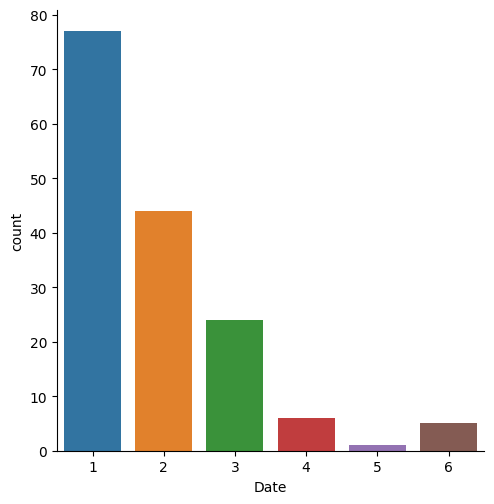

In [24]:
import matplotlib.pyplot as plt

# Créer le diagramme en bâtons
g = sns.catplot(x=dp['NbAbs'], data=dp, kind='count')

# Personnaliser les étiquettes et le titre du diagramme
g.set(xlabel='Nombre d\'absences',
      ylabel='Effectif',
      title='Répartition des étudiants par nombre d\'absences')

# Ajuster la taille du diagramme
#plt.figure(figsize=(10, 6))

# Afficher le diagramme
plt.show()

In [ ]:
#calculs des quartiles
print("Q1 = ",dp.NbAbs.quantile(q=0.25))
print("Q2 = M = ",dp.NbAbs.quantile(q=0.5))
print("Q3 = ",dp.NbAbs.quantile(q=0.75))

In [ ]:
#courbe des fréquences cumulées
sns.displot(x='NbAbs', data = dp, kind = 'ecdf')

In [ ]:
#boîte à moustaches
sns.catplot(data = dp,x = 'NbAbs', kind = 'box')

### Interprétation

Ces résultats décrivent la distribution des absences parmi les étudiants. Voici une interprétation de ces résultats :

Voici quelques interprétations du diagramme en baton:

On a 12 étudiants qui n'ont aucune absences
On a 11 étudiants qui ont 1 absence
On a 4 étudiants qui ont 2 absences

On remarque qu'il y a un seul étudiant pour le nombre d'absences 10,12,13,15,17,18,19,30 et 34. On remarque que la moitié des étudiants ont moins de 3 absences et l'autre moitié sont au-dessus. Il semble que la majorité des étudiants a peu d'absences (1 ou 2), alors que le nombre d'étudiants ayant un nombre d'absences plus élevé est plus faible. Cela pourrait indiquer une bonne participation globale des étudiants.


## 4. Performance académique des étudiants<a class="anchor" id="sec4"></a>

La troisième partie de notre étude est consacrée à l'analyse des performances académiques des étudiants. L'objectif principal de cette section est de comprendre et d'explorer les facteurs qui peuvent influencer les performances académiques et d'examiner comment elles se traduisent en termes de résultats obtenus par les étudiants.

Nous commencerons par examiner la proportion des notes du portfolio par étudiant. Cette analyse nous donnera un aperçu des performances individuelles des étudiants.

Nous nous pencherons ensuite sur l'impact potentiel de l'âge des étudiants sur leurs résultats académiques. Cela nous permettra d'identifier si l'âge peut être un facteur déterminant dans les performances académiques.

Ensuite, nous examinerons le lien entre le motif des absences et les résultats académiques des étudiants. Cela nous aidera à comprendre si certaines raisons d'absence sont plus fortement liées à des performances académiques faibles ou élevées.

Nous explorerons également si le nombre d'absences a une influence sur les notes obtenues. Cela peut nous aider à comprendre comment l'engagement peut affecter les performances académiques.

Enfin, nous analyserons les liens entre les résultats dans différentes Unités d'Enseignement, en particulier dans les matières liées aux langues et à la communication, ainsi qu'entre les matières scientifiques et non scientifiques. Ces analyses nous permettront de comprendre comment les compétences dans certaines matières peuvent influencer les performances dans d'autres.

Nous avons décider pour cette partie de modifier la base de donnée. Nous expliquons ce choix par le fait que nous allons étudié les notes des étudiants hors certains d'entre eux ont décidé d'abandonner leurs cursus ce qui influence de manière à biaiser les résultats. En effet, on pourrait se retrouver avec des notes égale à 0 qui tirerait notre moyenne vers le bas.

### 4.A Proportion des notes du portfolio par étudiant<a class="anchor" id="sec4.1"></a>

Commençons par importer la base de données ainsi que les librairies nécessaires :

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
dp = pd.read_csv('etudiants.csv', sep = ';', decimal=",")

In [43]:
dp.drop([20,38], inplace=True)

In [44]:
dp.head()

,NumEtu,Naissance,Bac,ParcSup,UE 2.1,UE 2.2,UE 2.3,UE 2.4,UE 2.5,UE 2.6,...,R2.12,R2.13,R2.14,S2.01,S2.02,S2.03,S2.04,S2.05,S2.06,Portfolio
0,1,15/12/2002,S-Sciences,137.0,13.608,14.705,13.824,12.733,14.291,14.730,...,13.9,13.66,14.85,14.68,13.5,16.0,12.5,15.37,17.0,13.0
1,2,25/04/2002,STI2D,NaN,12.608,12.878,10.790,10.545,10.664,13.987,...,15.1,10.33,13.25,16.41,13.5,17.3,10.0,11.50,17.0,12.0
2,3,11/10/2003,STI2D,133.0,11.951,12.013,11.425,10.400,12.272,14.095,...,12.0,11.50,14.25,16.86,16.0,17.0,10.0,14.25,16.3,12.0
3,4,21/06/2002,STI2D,14.0,16.491,15.345,15.389,13.648,16.195,14.980,...,15.5,13.83,13.45,17.11,16.5,17.3,11.0,17.37,15.7,15.0
4,5,16/11/2003,NBGE,113.0,14.253,16.078,11.546,13.192,14.996,14.962,...,14.2,15.13,15.55,16.53,16.5,16.0,10.0,14.87,15.7,13.0


In [45]:
dp.describe()

,NumEtu,ParcSup,UE 2.1,UE 2.2,UE 2.3,UE 2.4,UE 2.5,UE 2.6,R2.01,R2.02,...,R2.12,R2.13,R2.14,S2.01,S2.02,S2.03,S2.04,S2.05,S2.06,Portfolio
count,53.000000,52.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,52.000000,51.000000,...,52.000000,52.000000,51.000000,51.000000,52.000000,51.000000,52.000000,52.000000,51.000000,52.000000
mean,27.924528,90.115385,13.288529,13.209333,12.733431,12.425961,13.528745,13.514294,10.894231,13.181176,...,12.773077,12.825192,14.612745,15.622745,13.384615,15.554902,11.586538,14.873846,14.617647,13.519231
std,16.225394,48.406633,1.766936,2.331890,2.175302,1.357421,1.374270,1.546743,3.106897,1.524144,...,1.910458,1.925360,2.473112,2.655736,3.898989,1.470689,2.097433,1.861505,2.059486,2.287994
min,1.000000,2.000000,9.043000,7.343000,8.538000,8.959000,10.664000,10.128000,5.000000,9.580000,...,8.500000,8.400000,8.200000,8.330000,4.500000,12.700000,7.500000,11.500000,10.200000,5.000000
25%,14.000000,47.500000,12.048000,11.938000,11.422000,11.330000,12.562500,12.379500,8.750000,12.395000,...,11.400000,11.660000,13.250000,14.680000,12.250000,14.300000,10.000000,13.620000,13.250000,13.000000
50%,28.000000,99.500000,13.620000,13.460000,12.802000,12.646000,13.649000,13.877000,10.500000,13.710000,...,12.800000,13.000000,14.850000,15.580000,14.500000,16.000000,11.000000,15.120000,15.000000,14.000000
75%,42.000000,133.250000,14.251500,15.215500,14.657000,13.587000,14.292000,14.692000,13.000000,14.170000,...,14.100000,14.160000,16.250000,16.985000,16.500000,17.000000,13.000000,16.120000,16.300000,15.000000
max,55.000000,196.000000,16.491000,17.153000,16.968000,14.296000,16.195000,16.062000,17.000000,15.330000,...,17.700000,18.500000,18.800000,18.820000,18.000000,17.300000,16.000000,17.620000,18.700000,20.000000


Nous pouvons enfin commencer notre étude statistique:

In [46]:
dp.Portfolio.value_counts(bins = range(0,25,5)).sort_index()

(-0.001, 5.0]     2
(5.0, 10.0]       0
(10.0, 15.0]     48
(15.0, 20.0]      2
Name: Portfolio, dtype: int64

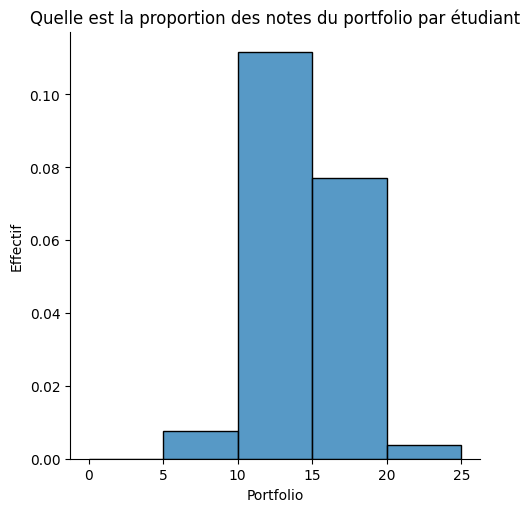

In [47]:
g = sns.displot(x = dp.Portfolio, bins = [0,5,10,15,20,25], kind = 'hist', stat='density')
g.set(title = "Quelle est la proportion des notes du portfolio par étudiant",
     xlabel="Portfolio",
     ylabel="Effectif")

### Interprétation

Les résultats indiquent la distribution des notes du portfolio par étudiant en quatre groupes ou intervalles de notes :

-Il y a 2 étudiants qui ont des notes dans l'intervalle ]-0.001, 5.0], c'est-à-dire des notes supérieures à 0 et inférieures ou égales à 5.

-Il n'y a aucun étudiant qui a des notes dans l'intervalle (5.0, 10.0], c'est-à-dire des notes supérieures à 5 et inférieures ou égales à 10.

-Il y a 48 étudiants qui ont des notes dans l'intervalle (10.0, 15.0], c'est-à-dire des notes supérieures à 10 et inférieures ou égales à 15.

-Il y a 2 étudiants qui ont des notes dans l'intervalle (15.0, 20.0], c'est-à-dire des notes supérieures à 15 et inférieures ou égales à 20.

Cela indique que la majorité des étudiants ont des notes de portfolio dans l'intervalle de 10 à 15. Très peu d'étudiants ont des notes inférieures à 5 ou supérieures à 15.

### 4.B Impact de l'âge des étudiants sur leurs résultats académiques<a class="anchor" id="sec4.2"></a>

In [49]:
from datetime import datetime

# Ajout de la colonne 'Age' avec une valeur par défaut '0'
dp['Age'] = 0

# Obtenir la date actuelle
date_actuelle = datetime.now().date()

# Convertir la colonne 'Naissance' en format datetime
dp['Naissance'] = pd.to_datetime(dp['Naissance'])

# Calculer l'âge en années
dp['Age'] = (date_actuelle - dp['Naissance'].dt.date).dt.days // 365

# Affichage des premières lignes du DataFrame modifié
print(dp.head())


#sns.relplot(data=dp, x="Age", y="Moyenne")


   NumEtu  Naissance         Bac  ParcSup  UE 2.1  UE 2.2  UE 2.3  UE 2.4  \
0       1 2002-12-15  S-Sciences    137.0  13.608  14.705  13.824  12.733   
1       2 2002-04-25       STI2D      NaN  12.608  12.878  10.790  10.545   
2       3 2003-11-10       STI2D    133.0  11.951  12.013  11.425  10.400   
3       4 2002-06-21       STI2D     14.0  16.491  15.345  15.389  13.648   
4       5 2003-11-16        NBGE    113.0  14.253  16.078  11.546  13.192   

   UE 2.5  UE 2.6  ...  R2.13  R2.14  S2.01  S2.02  S2.03  S2.04  S2.05  \
0  14.291  14.730  ...  13.66  14.85  14.68   13.5   16.0   12.5  15.37   
1  10.664  13.987  ...  10.33  13.25  16.41   13.5   17.3   10.0  11.50   
2  12.272  14.095  ...  11.50  14.25  16.86   16.0   17.0   10.0  14.25   
3  16.195  14.980  ...  13.83  13.45  17.11   16.5   17.3   11.0  17.37   
4  14.996  14.962  ...  15.13  15.55  16.53   16.5   16.0   10.0  14.87   

   S2.06  Portfolio  Age  
0   17.0       13.0   20  
1   17.0       12.0   21  
2   1

ValueError: Could not interpret value `Moyenne` for parameter `y`

In [38]:
sns.lmplot(data=dp, x="Age", y="Moyenne")

KeyError: "['Moyenne'] not in index"

Calculons à présent les

In [39]:
from scipy.stats import linregress
a, b, r, p_value, std_err = linregress(dp.Age, dp.Moyenne)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

AttributeError: 'DataFrame' object has no attribute 'Moyenne'

### Interprétation

Les résultats indiquent la distribution des moyennes des notes en fonction de l'age de l'étudiant :

La moyenne de la moyenne des notes des étudiants est d'environ 13/20.

On constate que les moyennes des notes à l'age de 20 est très dispersée. Cette étendue est moins important pour les étudiants ayant 19 ans.Cela peut s'expliquer par le fait que la population d'étudiant ayant 20 ans est plus grande. 

Au vu de la faible corélation entre les points, on ne peut pas en déduire avec ses résultats que l'age influence les résultats de l'étudiant.

### 4.C Influence du nombre d'absences sur les notes obtenues<a class="anchor" id="sec4.3"></a>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

dp['NbAbs']=0
for i in range(1,dp.NumEtu.count()):
    dp['NbAbs'].loc[dp['NumEtu'] == i] = df[df.NumEtu == i].Date.count()

sns.lmplot(data=dp, x="NbAbs", y="Moyenne")

plt.xlabel('Nombre d\'absences')
plt.ylabel('Moyenne')
plt.title('Relation entre le nombre d\'absences et la moyenne')

plt.show()

NameError: name 'dp' is not defined

### 4.D Lien entre les notes obtenues dans les matières scientifiques et les matières non scientifiques<a class="anchor" id="sec4.4"></a>

In [ ]:
# Calculer la moyenne des UE pour chaque étudiant dans une nouvelle colonne
dp['MoyenneUESciences'] = dp[['UE 2.1', 'UE 2.2', 'UE 2.3', 'UE 2.4', 'UE 2.5']].mean(axis=1)

# Affichage des premières lignes du DataFrame modifié
print(dp.head())

In [ ]:
sns.lmplot(data=dp, x="MoyenneUESciences", y="UE 2.6")

In [ ]:
from scipy.stats import linregress
a, b, r, p_value, std_err = linregress(dp.MoyenneUESciences, dp['UE 2.6'])
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

### Interprétation

Nuage de points:

On remarque qu'on a une corrélation positive entre les moyennes des matières scientifiques et non scientifiques. En effet, lorsque l'axe des moyennes des matières scientifiques augmentent, l'axe des matières non-scientifiques augmentent aussi.

Les élèves qui réussissent bien dans les matières scientifiques ont aussi tendance à réussir dans les matières non scientifiques. Cela pourrait être dû à une variété de facteurs, tels que des compétences d'étude solides, une bonne gestion du temps, ou une motivation intrinsèque pour réussir à l'école.

## 5. Synthèse des résultats et conclusions<a class="anchor" id="sec5"></a>

### Partie 1: les profils étudiants

La majorité des étudiants proviennent des filières de baccalauréat STI2D et NBGE, ce qui suggère que l'institution attire principalement des étudiants avec des parcours académiques diversifiés, axés sur les sciences et technologies ou des baccalauréats généraux.

Les mentions obtenues au baccalauréat sont généralement "Assez Bien", ce qui suggère un niveau de performance académique satisfaisant pour une grande partie des étudiants. Il est également à noter que la mention "Très bien" est moins fréquente, ce qui peut indiquer un niveau de performance exceptionnellement élevé chez une petite proportion d'étudiants.

La majorité des étudiants réussissent à valider leur année, ce qui montre une forte réussite académique globale. Une petite proportion d'étudiants sont dans la situation "Ajac", ce qui indique qu'ils peuvent continuer leurs études tout en rattrapant des matières non validées.

Il y a une association statistiquement significative entre le type de baccalauréat et les mentions obtenues. Cela suggère que le parcours académique antérieur d'un étudiant peut avoir une influence sur son niveau de performance à l'institution.

Les étudiants issus du baccalauréat NBGE semblent avoir une légère tendance à obtenir des mentions plus élevées par rapport à ceux des autres filières. Les étudiants de la filière STMG semblent rencontrer plus de difficultés à obtenir des mentions.

Les étudiants ayant un baccalauréat général semblent avoir une légère tendance à mieux performer académiquement par rapport aux étudiants ayant un baccalauréat technologique. Cela peut être dû à divers facteurs, y compris les compétences et connaissances acquises dans leur parcours académique antérieur.

En somme, ces analyses démontrent l'importance du parcours scolaire antérieur dans la réussite académique future et suggèrent que l'institution pourrait bénéficier de l'adaptation de ses stratégies pédagogiques et de ses politiques de recrutement en conséquence. Par exemple, en fournissant un soutien supplémentaire aux étudiants issus de certaines filières, ou en cherchant à attirer des étudiants de diverses filières pour enrichir davantage la diversité académique de sa population étudiante.

### Partie 2:Analyse des absences

La majorité des absences sont justifiées, soit 71% contre 29% d'injustifiées. Cela montre que la plupart des étudiants ont des motifs valables pour leurs absences. Toutefois, la proportion non négligeable d'absences non justifiées nécessite une attention particulière.

Les absences sont plus fréquentes le matin (74%) par rapport à l'après-midi (26%). Cela peut être attribué à divers facteurs tels que les contraintes personnelles des étudiants le matin ou une préférence pour les cours de l'après-midi.

Les travaux dirigés (TD) enregistrent le plus grand nombre d'absences. Cela pourrait indiquer que les étudiants trouvent ces sessions moins attrayantes ou moins nécessaires. Les projets, en revanche, ont le moins d'absences, ce qui pourrait indiquer que les étudiants considèrent ces sessions comme cruciales pour leur réussite académique.

L'impact de l'enseignant sur le taux d'absentéisme n'est pas significatif, comme le suggère le test du Chi-carré. Cela signifie que l'absentéisme est plus probablement influencé par d'autres facteurs que l'enseignant lui-même.

Les absences sont plus fréquentes durant les mois d'hiver, avec une augmentation notable en avril. Cela pourrait être attribué à divers facteurs tels que le relâchement des étudiants après les partiels ou l'approche des vacances de printemps.

Les absences justifiées sont particulièrement élevées en janvier, mars et avril, ce qui pourrait être lié à une pression académique accrue durant ces mois. Les absences non justifiées, en revanche, sont plus fréquentes en mars, avril et juin, ce qui pourrait indiquer une baisse de la motivation des étudiants pendant ces mois.

En somme, il semble que l'absentéisme est un phénomène complexe, influencé par une multitude de facteurs allant du moment de la journée aux périodes de l'année, en passant par le type de cours. Une compréhension détaillée de ces facteurs peut aider à concevoir des interventions efficaces pour réduire l'absentéisme et améliorer la participation des étudiants.


### Partie 3: Performances académiques des étudiants

La majorité des étudiants ont des notes de portfolio dans l'intervalle de 10 à 15. Très peu d'étudiants ont des notes inférieures à 5 ou supérieures à 15. Cela indique que la plupart des étudiants performent moyennement dans leurs portfolios.

Il n'y a pas de corrélation claire entre l'âge des étudiants et leurs moyennes de notes. Il est important de noter que la dispersion des notes est plus grande pour les étudiants de 20 ans, peut-être en raison d'un effectif plus important dans ce groupe d'âge. Cependant, ce manque de corrélation suggère que l'âge n'est pas un facteur déterminant pour la réussite académique.

De même, il n'y a pas de corrélation évidente entre le nombre d'absences d'un étudiant et sa moyenne de notes. Cela peut être un point surprenant, car on pourrait s'attendre à ce qu'un nombre élevé d'absences entrave la performance académique. Cela pourrait suggérer que d'autres facteurs, comme l'effort personnel et les stratégies d'étude, sont plus déterminants pour la réussite académique.

Il existe une corrélation positive entre les moyennes des matières scientifiques et non scientifiques. Cela suggère que les compétences qui contribuent à la réussite dans un type de matière peuvent être transférables à l'autre. Les étudiants qui réussissent dans les matières scientifiques ont aussi tendance à réussir dans les matières non scientifiques, ce qui pourrait indiquer une compétence académique globale plutôt qu'une spécialisation dans un domaine particulier.

En somme, ces résultats indiquent que la réussite académique ne dépend pas uniquement de l'assiduité ou de l'âge, mais semble être une combinaison de divers facteurs dont la transférabilité des compétences académiques d'un domaine à l'autre. Par ailleurs, la performance moyenne dans les portfolios indique qu'il y a une marge pour l'amélioration et que des stratégies ciblées pourraient être mises en place pour aider les étudiants à améliorer leurs notes.


<table style="width:100%">
  <tr>
    <th>Type</th>
    <th>Nom variable</th> 
    <th>Qui</th>
  </tr>
  <tr>
    <td>Qualitative nominale</td>
    <td>Justification</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>Qualitative ordinale</td>
    <td>Mention</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>Quantitative discrète</td>
    <td>NbAbs</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>Quantitative continue</td>
    <td>Notes Portfolio</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>2 Quantitatives</td>
    <td>NbAbs/prof</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>2 Quantitatives</td>
    <td>Age/moyenne</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>Qualitative nominale</td>
    <td>Type de bac</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>Qualitative ordinale</td>
    <td>Passe ?</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>Qualitative et Quantitative</td>
    <td>NbAbs/TypeCours</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>2 Quantitatives</td>
    <td>NbAbs/Moyenne</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>Qualitative nominale</td>
    <td>Moment</td> 
    <td>Johanne</td>
  </tr>
  <tr>
    <td>Qualitative et Quantitative</td>
    <td>NbAbs/Moyenne</td> 
    <td>Éloïse</td>
  </tr>
  <tr>
    <td>2 Quantitatives</td>
    <td>MoyenneSciences/UE 2.6</td> 
    <td>Éloïse</td>
  </tr>
</table>